# EDA

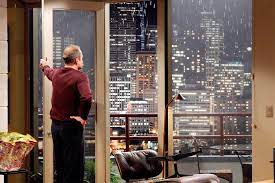

In [127]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno to check for the missing data
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#already imported
#import pandas as pd

In [6]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [24]:
#for importing the combined datatables first import data and open a connection
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [ ]:
#import the data to a pandas dataframe, left join to not loose data
query_string = """SELECT * 
FROM eda.king_county_house_details kchd 
LEFT JOIN eda.king_county_house_sales kchs  ON kchd.id = kchs.house_id ;"""
df_king_county = pd.read_sql(query_string, db)

In [ ]:
#import the data with inner join to a pandas dataframe to 1. compare sizes and second see if already any entries are redundant and are automatically removed
query_stringi = """SELECT * 
FROM eda.king_county_house_details kchd 
INNER JOIN eda.king_county_house_sales kchs  ON kchd.id = kchs.house_id ;"""
df_king_countyi = pd.read_sql(query_stringi, db)

In [ ]:
#solution from neue fische
query_string = """set SCHEMA 'eda';

select kchd.*,kchs."date" ,kchs.price 
from king_county_house_details kchd 
left join king_county_house_sales kchs 
on kchd.id = kchs.house_id;"""


In [10]:
df_king_county.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


In [23]:
df_king_county.size

496731

In [26]:
df_king_countyi.size

496731

In [14]:
#export the data to a csv-file
df_king_county.to_csv('data/eda.csv',index=False)

In [117]:
#import the data from a csv-file
df_king_county_imp = pd.read_csv('data/eda.csv')

In [104]:
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', 1000)         # Make the display wide enough
pd.set_option('display.expand_frame_repr', False)  # Avoid line wrapping

df_king_county_imp.head(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,3890.000,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000,7237550310,6
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,1715.000,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000,1321400060,7
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,1060.000,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000,2008000270,8
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,1050.000,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000,2414600126,9
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,1890.000,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000,3793500160,10


In [77]:
#at first glance there are nan values
#check dataframe size
df_king_county_imp.size

496731

In [ ]:
#choose Jennifer Montgomery Buyer
#Jennifer Montgomery	Buyer	High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year
#Hypotheses:
#1. Does the season affect house prices? If houses are close to the water prices are higher.
#2. Waterfront houses have higher grades.
#3. Waterfront houses are mostly outside city areas. (geographical)

In [27]:
df_king_county_imp.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,1530.000,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000,263000018,21593
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,2310.000,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000,6600060120,21594
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000,1523300141,21595
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,1600.000,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000,291310100,21596
21596,1523300157,2.000,0.750,1020.000,1076.000,2.000,0.000,0.000,3,7,1020.000,0.000,2008,0.000,98144,47.594,-122.299,1020.000,1357.000,2014-10-15,325000.000,1523300157,21597


In [28]:
df_king_county_imp.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [29]:
df_king_county_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [78]:
#the column names are without spaces and with lower case
#check for duplicates - no duplicates
df_king_county_imp.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [118]:
#change date to datetime
df_king_county_imp['date'] = pd.to_datetime(df_king_county_imp['date'])
#leave years as int
#df_king_county_imp['yr_built'] = pd.to_datetime(df_king_county_imp['yr_built'], format='%Y', errors='coerce')
#df_king_county_imp['yr_renovated'] = pd.to_datetime(df_king_county_imp['yr_renovated'])

#change bedroom, sqft_iving and lot to int
df_king_county_imp['bedrooms'] = pd.to_numeric(df_king_county_imp['bedrooms'], downcast='integer')
df_king_county_imp['sqft_living'] = pd.to_numeric(df_king_county_imp['sqft_living'], downcast='integer')
df_king_county_imp['sqft_lot'] = pd.to_numeric(df_king_county_imp['sqft_lot'], downcast='integer')
df_king_county_imp['sqft_above'] = pd.to_numeric(df_king_county_imp['sqft_above'], downcast='integer')
df_king_county_imp['sqft_basement'] = df_king_county_imp['sqft_basement'].astype('Int64')
df_king_county_imp['sqft_living15'] = pd.to_numeric(df_king_county_imp['sqft_living15'], downcast='integer')
df_king_county_imp['sqft_lot15'] = pd.to_numeric(df_king_county_imp['sqft_lot15'], downcast='integer')
df_king_county_imp['price'] = pd.to_numeric(df_king_county_imp['price'], downcast='integer')
#round bathrooms and floors to 2 digits after the comma
df_king_county_imp['bathrooms'] = df_king_county_imp['bathrooms'].round(2)
df_king_county_imp['floors'] = df_king_county_imp['floors'].round(2)

In [80]:
#check date dtype
type(df_king_county_imp['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
#check if there are values with digits after the comma in the column
(df_king_county_imp['sqft_living'] % 1 != 0).sum()

np.int64(0)

In [ ]:
#check if there are nan values
df_king_county_imp.sqft_living.isna().sum()

np.int64(0)

In [55]:
#check if there are values with digits after the comma in the column
(df_king_county_imp['sqft_lot'] % 1 != 0).sum()

np.int64(0)

In [57]:
#check if there are nan values
df_king_county_imp.sqft_lot.isna().sum()

np.int64(0)

In [61]:
#check if there are values with digits after the comma in the column
(df_king_county_imp['view'] % 1 != 0).sum()

np.int64(63)

In [ ]:
#for bathrooms there are also not full bathrooms. “full,” bathrooms need to have all four of the main fixtures: A toilet, sink, bathtub, and shower. 
#if one is missing it's a 3/4 or with only 2 it's 1/2 and so on


In [120]:
#clean up the renovation year as there seems to be a 0 at the end too much and convert it to int and leave nan values
def clean_year(x):
    if pd.isna(x):
        return pd.NA
    x_int = int(x)  # convert float to integer
    # Only fix if year is unrealistically large (e.g., > current year + 100)
    if len(str(x_int)) > 4:
        x_str = str(x_int)
        return int(x_str[:-1])  # drop last digit
    else:
        return x_int

# Apply to the column
df_king_county_imp['yr_renovated'] = df_king_county_imp['yr_renovated'].apply(clean_year).astype('Int64')

In [121]:
df_king_county_imp.head(50)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014-10-13,221900,7129300520,1
1,6414100192,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014-12-09,538000,6414100192,2
2,5631500400,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0,1933,<NA>,98028,47.738,-122.233,2720,8062,2015-02-25,180000,5631500400,3
3,2487200875,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014-12-09,604000,2487200875,4
4,1954400510,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015-02-18,510000,1954400510,5
5,7237550310,4,4.500,5420,101930,1.000,0.000,0.000,3,11,3890,1530,2001,0,98053,47.656,-122.005,4760,101930,2014-05-12,1230000,7237550310,6
6,1321400060,3,2.250,1715,6819,2.000,0.000,0.000,3,7,1715,<NA>,1995,0,98003,47.310,-122.327,2238,6819,2014-06-27,257500,1321400060,7
7,2008000270,3,1.500,1060,9711,1.000,0.000,NaN,3,7,1060,0,1963,0,98198,47.410,-122.315,1650,9711,2015-01-15,291850,2008000270,8
8,2414600126,3,1.000,1780,7470,1.000,0.000,0.000,3,7,1050,730,1960,0,98146,47.512,-122.337,1780,8113,2015-04-15,229500,2414600126,9
9,3793500160,3,2.500,1890,6560,2.000,0.000,0.000,3,7,1890,0,2003,0,98038,47.368,-122.031,2390,7570,2015-03-12,323000,3793500160,10


In [124]:
# Function to check decimals (ignores NaNs)
def has_decimals(series):
    # Only check numeric columns
    if pd.api.types.is_numeric_dtype(series):
        return ((series % 1 != 0) & ~series.isna()).any()
    else:
        return False

# Build a summary DataFrame
summary = pd.DataFrame({
    'has_decimals': [has_decimals(df_king_county_imp[col]) for col in df_king_county_imp.columns],
    'has_nans': [df_king_county_imp[col].isna().any() for col in df_king_county_imp.columns],
}, index=df_king_county_imp.columns)
summary


,has_decimals,has_nans
id,False,False
bedrooms,False,False
bathrooms,True,False
sqft_living,False,False
sqft_lot,False,False
floors,True,False
waterfront,False,True
view,False,True
condition,False,False
grade,False,False


In [122]:
df_king_county_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  int8          
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int16         
 4   sqft_lot       21597 non-null  int32         
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int16         
 11  sqft_basement  21145 non-null  Int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  Int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [125]:
#next check with missingno how many nan values are present
# display number of missing values per column
df_king_county_imp.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

<Axes: >

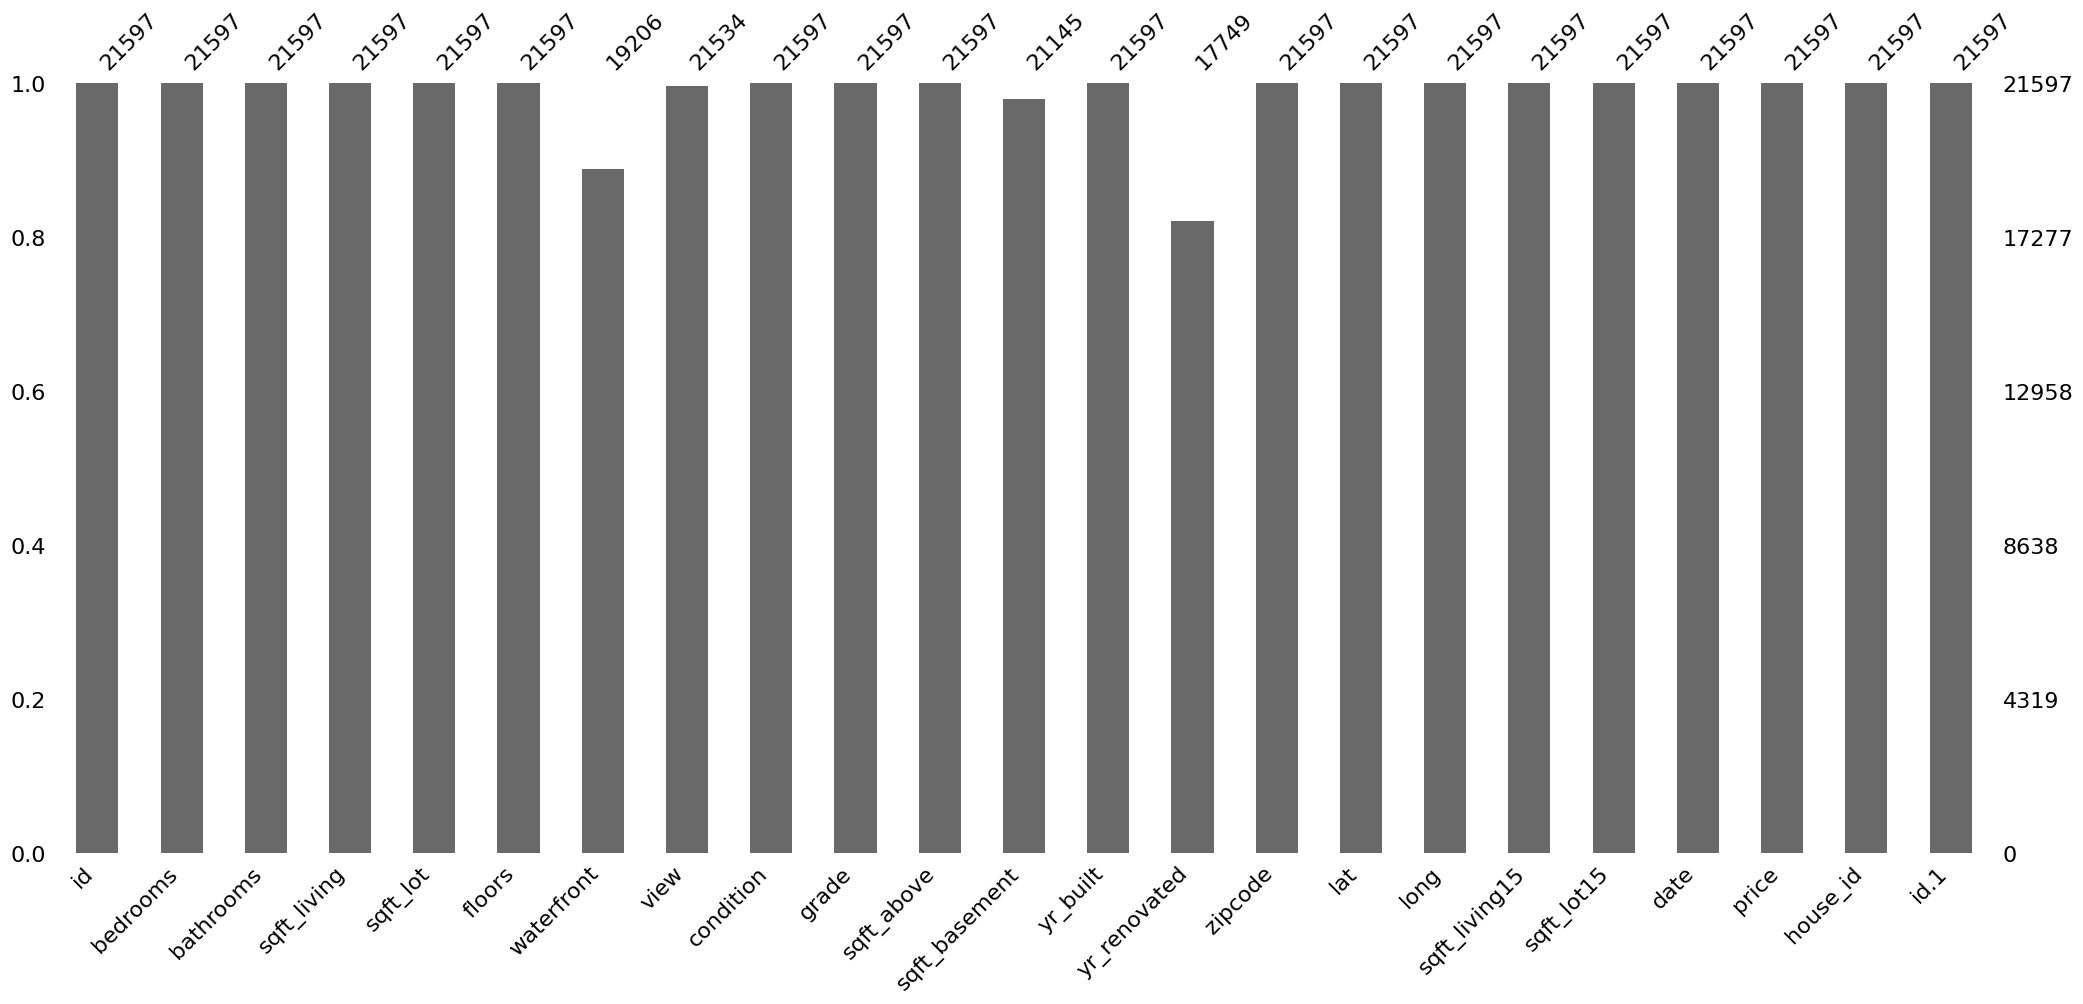

In [128]:
# plotting percentage of missing values per column
msno.bar(df_king_county_imp)

<Axes: >

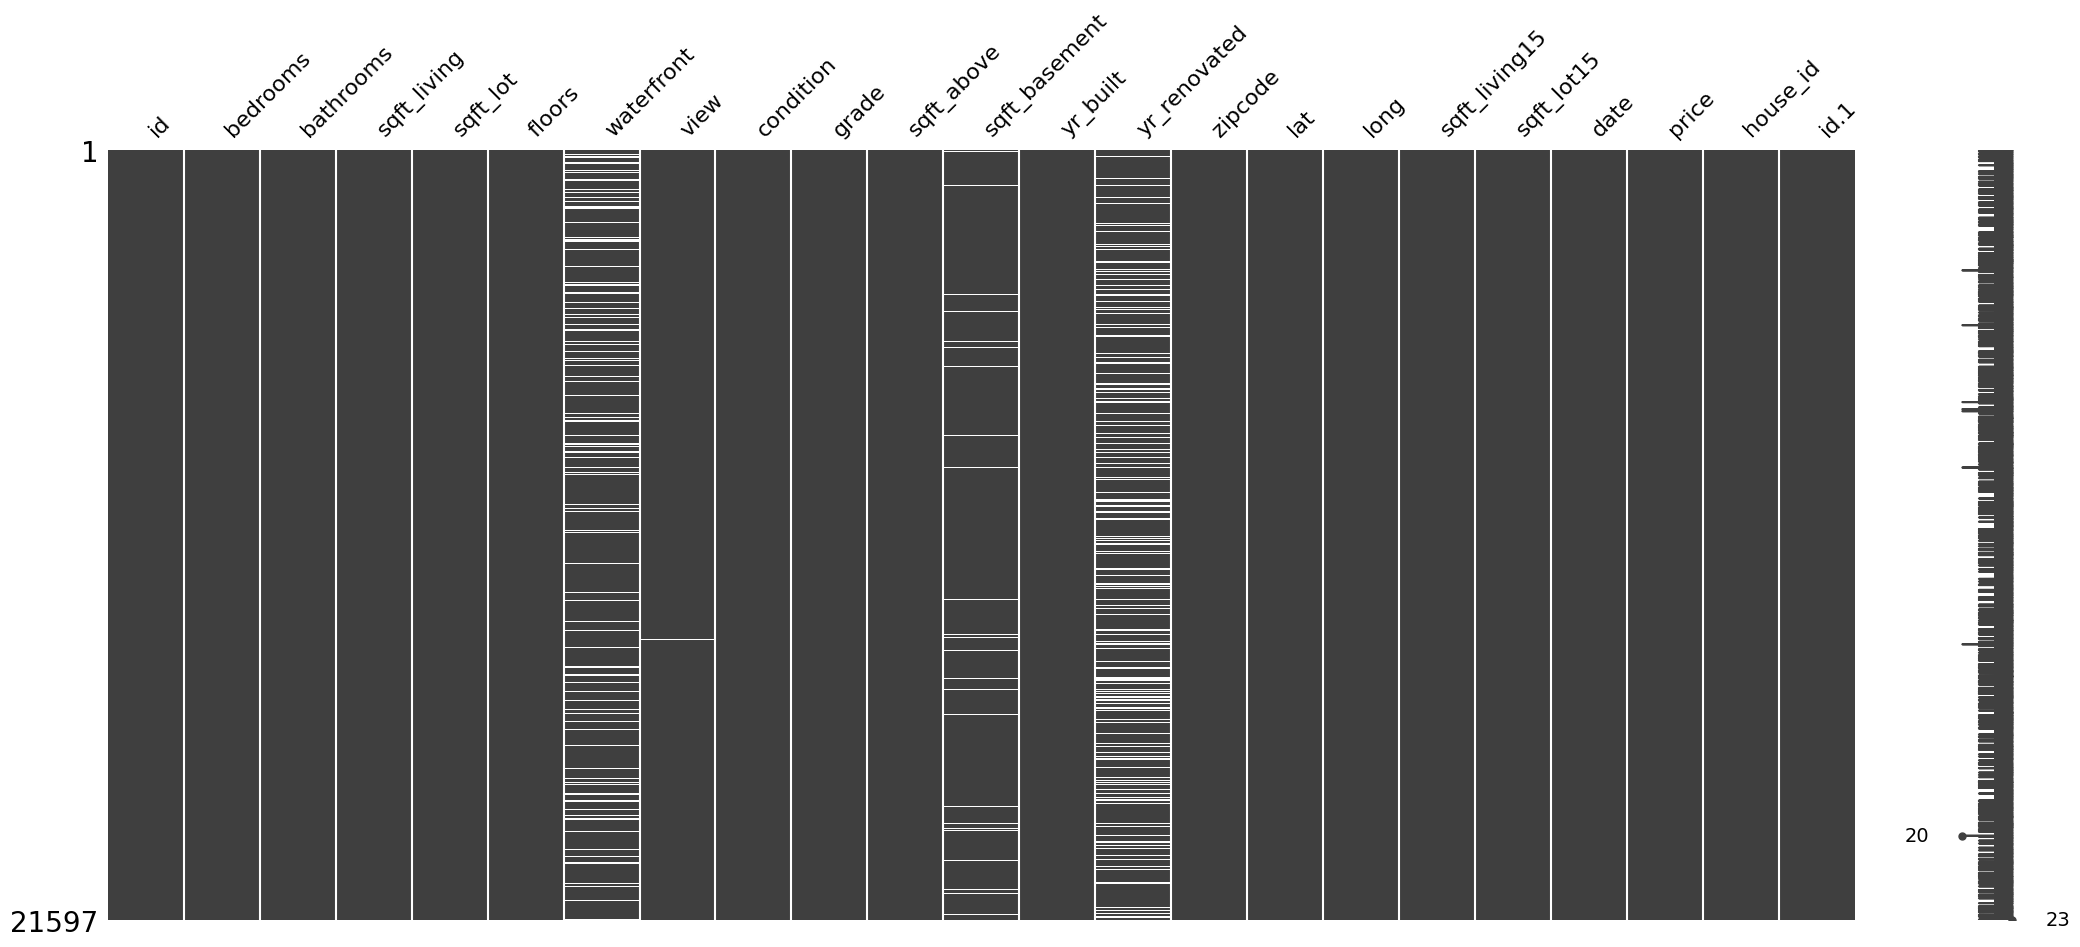

In [129]:
msno.matrix(df_king_county_imp)

Result: There is missing data! Theoretically we could mean that we tell the client for the house we are still missing the data and we could inquire if needed (and keep all the values). But since Jennifer Montgomery is explicitly interested in properties with a waterfront and which are renovated we could drop the properties of which we don't know if they are at a waterfront. For the renovation year I would treat the properties with nan values as not renovated. Depending on how many values/properties disappear we continue after. 

In [ ]:
#check F